# BIG DATA COURSEWORK

## -----------------------------------------------------------------------------------------------------------------------------

# TABLE OF CONTENTS

   ## I. Collection data
   ## II. Analyzing data
   ## III. Data wrangling
   ## IV. Train & Test
   ## V. Accuracy check

----------------------------------------------------------------------------------------------------------------------

# I. Collection the data

Collect data: Import Librairies

In [185]:
# Importing the necessary Python libraries

import numpy as np #numerical python library
import pandas as pd #for data analysis
import seaborn as sns #statistical plotting
import matplotlib.pyplot as plt #for plotting

#to be able to run matplotlib in jupiter
%matplotlib inline 

import math #calculate basic mathematical functions

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# Loading the original bank dataset in a dataframe
original_data = pd.read_csv('original_bank_data.csv')

#A quick overview of the first 10 records 
original_data.head(10)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,binary_subscribed
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261,1,-1.0,0,unknown,no,0
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151,1,-1.0,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76,1,-1.0,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92,1,-1.0,0,unknown,no,0
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198,1,-1.0,0,unknown,no,0
5,35,management,married,tertiary,no,231.0,yes,no,unknown,5.0,may,139,1,-1.0,0,unknown,no,0
6,28,management,single,tertiary,no,447.0,yes,yes,unknown,5.0,may,217,1,-1.0,0,unknown,no,0
7,42,entrepreneur,divorced,tertiary,yes,2.0,yes,no,unknown,5.0,may,380,1,-1.0,0,unknown,no,0
8,58,retired,married,primary,no,121.0,yes,no,unknown,5.0,may,50,1,-1.0,0,unknown,no,0
9,43,technician,single,secondary,no,593.0,yes,no,unknown,5.0,may,55,1,-1.0,0,unknown,no,0


In [186]:
#Number of clients in this dataset
print("Number of clients in original dataset:" + str(len(original_data.index)))


Number of clients in original dataset:15111


----------------------------------------------------------------------------------------------------------------------

## II. Analyzing data

Creating different plot to check relationship between variables

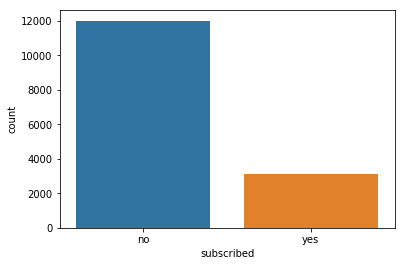

In [187]:
#Number of clients in our dataset who subscribed or not to past term deposit offer
sns.countplot(x="subscribed", data=original_data)

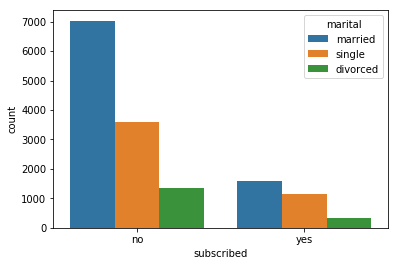

In [188]:
#Marital status of the clients who subscribed or not
sns.countplot(x="subscribed", hue="marital", data=original_data)

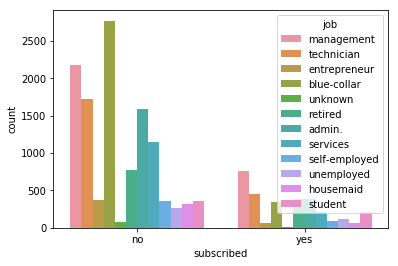

In [189]:
#Job of the clients who subscribed or not
sns.countplot(x="subscribed", hue="job", data=original_data)

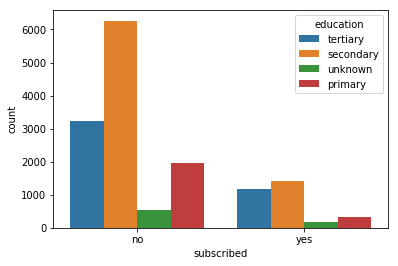

In [190]:
#Level of education or the clients who subscribed or not
sns.countplot(x="subscribed", hue="education", data=original_data)

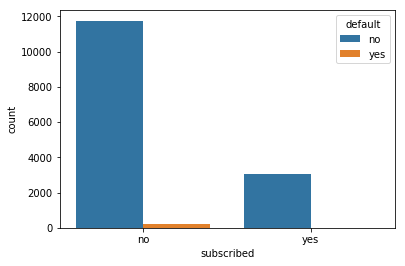

In [191]:
# does the clients who subscribed or not has a credit in default ?
sns.countplot(x="subscribed", hue="default", data=original_data)

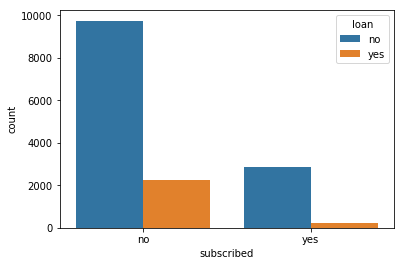

In [192]:
# does the clients who subscribed or not has a loan personal ?
sns.countplot(x="subscribed", hue="loan", data=original_data)

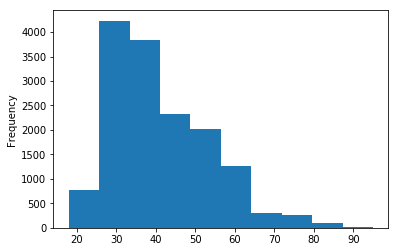

In [193]:
#Age distribution of the clients 
original_data["age"].plot.hist()

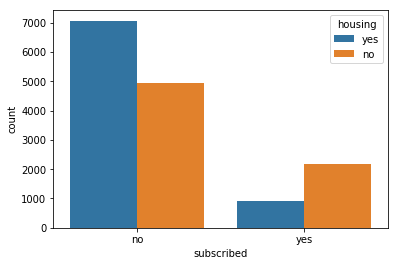

In [194]:
# does the clients who subscribed or not has a housing loan ?
sns.countplot(x="subscribed", hue="housing", data=original_data)

In [195]:
#Info about the dataset
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15111 entries, 0 to 15110
Data columns (total 18 columns):
age                  15111 non-null int64
job                  15042 non-null object
marital              15099 non-null object
education            15080 non-null object
default              15060 non-null object
balance              15110 non-null float64
housing              15096 non-null object
loan                 15111 non-null object
contact              15081 non-null object
day                  14988 non-null float64
month                14999 non-null object
duration             15111 non-null int64
campaign             15111 non-null int64
pdays                15091 non-null float64
previous             15111 non-null int64
poutcome             15111 non-null object
subscribed           15111 non-null object
binary_subscribed    15111 non-null int64
dtypes: float64(3), int64(5), object(10)
memory usage: 2.1+ MB


----------------------------------------------------------------------------------------------------------------------

## III. Data Wrangling

1. Data wrangling is cleaning the data by removing the NaN values and unnecessary columns in the dataset

In [196]:

#Identifying missing values
missing_val = original_data.isnull().sum()

print("Total number of missing values is: " + str(missing_val.sum()) + "\n")
print("Find below the missing values for each attributes:")

missing_val

Total number of missing values is: 464

Find below the missing values for each attributes:


age                    0
job                   69
marital               12
education             31
default               51
balance                1
housing               15
loan                   0
contact               30
day                  123
month                112
duration               0
campaign               0
pdays                 20
previous               0
poutcome               0
subscribed             0
binary_subscribed      0
dtype: int64

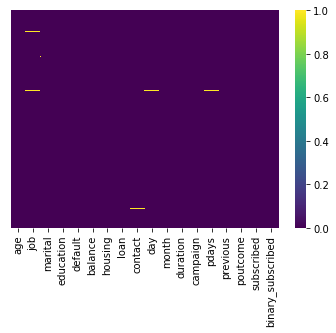

In [197]:
#Visualization of missing values through heatmap
sns.heatmap(original_data.isnull(), yticklabels=False, cmap="viridis")

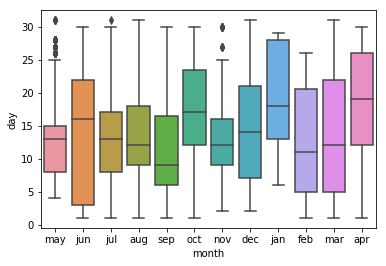

In [198]:
#
sns.boxplot(x="month", y="day", data=original_data)

In [199]:
#Drop missing values (NaN)
original_data.dropna(inplace=True)

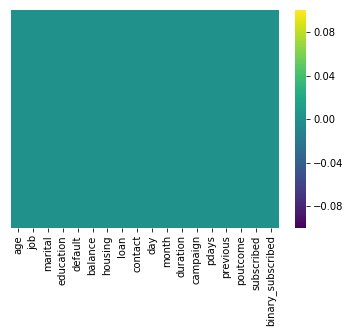

In [200]:
#Check whether we still have missing(NaN) values or not

sns.heatmap(original_data.isnull(), yticklabels=False, cmap="viridis")

In [201]:
#This confirms that our dataset is clean

original_data.isnull().sum()

age                  0
job                  0
marital              0
education            0
default              0
balance              0
housing              0
loan                 0
contact              0
day                  0
month                0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
subscribed           0
binary_subscribed    0
dtype: int64

2. We will convert all our non-numerical values to numerical in order to use the Logistic regression model

In [202]:
original_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,binary_subscribed
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261,1,-1.0,0,unknown,no,0
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151,1,-1.0,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76,1,-1.0,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92,1,-1.0,0,unknown,no,0
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198,1,-1.0,0,unknown,no,0
5,35,management,married,tertiary,no,231.0,yes,no,unknown,5.0,may,139,1,-1.0,0,unknown,no,0
6,28,management,single,tertiary,no,447.0,yes,yes,unknown,5.0,may,217,1,-1.0,0,unknown,no,0
7,42,entrepreneur,divorced,tertiary,yes,2.0,yes,no,unknown,5.0,may,380,1,-1.0,0,unknown,no,0
8,58,retired,married,primary,no,121.0,yes,no,unknown,5.0,may,50,1,-1.0,0,unknown,no,0
9,43,technician,single,secondary,no,593.0,yes,no,unknown,5.0,may,55,1,-1.0,0,unknown,no,0


In [203]:
#job
job = pd.get_dummies(original_data['job'], drop_first=True)
job.head(5)

,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1


In [204]:
#Marital status

marital_status_1 = pd.get_dummies(original_data['marital'])
marital_status_1.head(5)

#if client is not married or divorced that means his single. So let's drop the single column
marital_status_2 = marital_status_1.drop(columns=['single']) 
marital_status_2.head(5)

,divorced,married
0,0,1
1,0,0
2,0,1
3,0,1
4,0,0


In [205]:
#Education level

#if client level of education is not primary, secondary or tertiary that means his education's level is unknown.
#Let's drop the unknown column
education_level = pd.get_dummies(original_data['education']).drop(columns=['unknown']) 
education_level.head(5)




,primary,secondary,tertiary
0,0,0,1
1,0,1,0
2,0,1,0
3,0,0,0
4,0,0,0


In [206]:
#Credit in default
has_credit_default = pd.get_dummies(original_data['default'], drop_first=True)
has_credit_default.head(5)

,yes
0,0
1,0
2,0
3,0
4,0


In [207]:
#Housing loan
has_housing_loan = pd.get_dummies(original_data['housing'], drop_first=True)
has_housing_loan.head(5)

,yes
0,1
1,1
2,1
3,1
4,0


In [208]:
#Personal loan
has_personal_loan = pd.get_dummies(original_data['loan'], drop_first=True)
has_personal_loan.head(5)

,yes
0,0
1,0
2,1
3,0
4,0


In [209]:
#Contact
contact = pd.get_dummies(original_data['contact']).drop(columns=['unknown']) 
contact.head(5)




,cellular,telephone
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [210]:
#outcome of the previous marketing campaign
poutcome = pd.get_dummies(original_data['poutcome']).drop(columns=['unknown']) 
poutcome.head(5)

,failure,other,success
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [211]:
#last contact month of year
#This column will not be relevant for our analysis
month = pd.get_dummies(original_data['month'])
#month.head(5)

In [212]:
binary_subscribed = pd.get_dummies(original_data['binary_subscribed'])
binary_subscribed.head(5)

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


 3. Concatenate all the new references into the original dataset

In [213]:
original_data = pd.concat([original_data, job, marital_status_2, has_credit_default, education_level, has_housing_loan, has_personal_loan, contact, poutcome], axis=1)
original_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,primary,secondary,tertiary,yes,yes,cellular,telephone,failure,other,success
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,...,0,0,1,1,0,0,0,0,0,0
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,...,0,1,0,1,0,0,0,0,0,0
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,...,0,1,0,1,1,0,0,0,0,0
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,...,0,0,0,1,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,...,0,0,0,0,0,0,0,0,0,0
5,35,management,married,tertiary,no,231.0,yes,no,unknown,5.0,...,0,0,1,1,0,0,0,0,0,0
6,28,management,single,tertiary,no,447.0,yes,yes,unknown,5.0,...,0,0,1,1,1,0,0,0,0,0
7,42,entrepreneur,divorced,tertiary,yes,2.0,yes,no,unknown,5.0,...,0,0,1,1,0,0,0,0,0,0
8,58,retired,married,primary,no,121.0,yes,no,unknown,5.0,...,1,0,0,1,0,0,0,0,0,0
9,43,technician,single,secondary,no,593.0,yes,no,unknown,5.0,...,0,1,0,1,0,0,0,0,0,0


In [214]:
#Dropping the irrelevant columns

original_data.drop(['age', 'duration', 'campaign', 'balance','day','pdays','job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed'], axis=1, inplace=True)

In [215]:
original_data.head(10)

,previous,binary_subscribed,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,...,primary,secondary,tertiary,yes,yes,cellular,telephone,failure,other,success
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


----------------------------------------------------------------------------------------------------------------------

## IV. Train & Test

Build the model on the train data and predict the output on the test data

In [216]:
#Spliting Data into training and testing subset

X = original_data.drop("binary_subscribed", axis=1) #Independent variables
y = original_data["binary_subscribed"] #Value we need to predict || subscribed or not

#print(y)
X.shape


(14819, 25)

In [217]:
#from sklearn.cross_validation import train_test_split
# X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [218]:
logmodel = LogisticRegression()

In [219]:
logmodel.fit(X_train, y_train)

C:\Users\23058\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [220]:

predictions = logmodel.predict(X_test)
#X_test

----------------------------------------------------------------------------------------------------------------------

## IV. Accuracy Check

Calculate accuracy to check accurate the results are

1.Evaluation using Classification report

In [221]:
#Evaluate how well the model is doing
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      3521
           1       0.71      0.28      0.40       925

   micro avg       0.83      0.83      0.83      4446
   macro avg       0.77      0.62      0.65      4446
weighted avg       0.81      0.83      0.79      4446



2.Evaluation confusion matrix 

![title](accuracy_matrix.jpg "Header")

In [222]:
#Determine accuracy using the confusion metric

print(confusion_matrix(y_test, predictions))

[[3414  107]
 [ 666  259]]


Calculate accuracy score manually

(3331 + 390) / (3331 + 190 + 535 + 390)

In [223]:
#Calculate accuracy score manually using the accuracy_score function in python
print("The accuracy score is:" + str( accuracy_score(y_test, predictions)) )

The accuracy score is:0.8261358524516419


 -----------------------------------------------------------------------------------------------------------------------------